## imports

In [5]:


import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import json 

import math
import seaborn as sns


!pip install scikit-posthocs

import scikit_posthocs as sp
from scipy import stats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Time measurement

In [6]:




url="https://datatalkturk.emanuelgraf.me/pipelines/time_into_jupyter.php"
time_data=pd.read_csv(url,header=0, keep_default_na=False, sep=',')




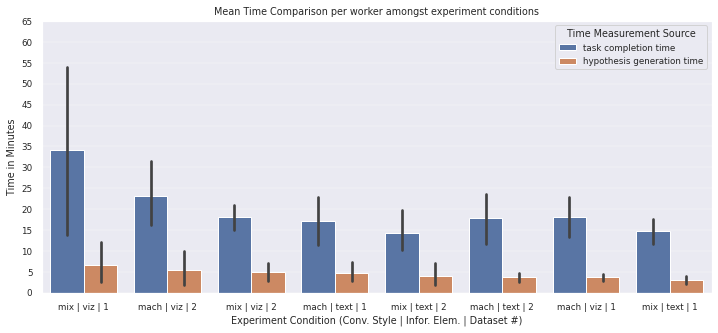

In [7]:





#time_data_temp = time_data[time_data['information_elements'].str.contains('text') & time_data['conversational_style'].str.contains('csmix') & time_data['dataset']==1]

time_data_temp = time_data.copy()

time_data_temp['time_to_last_message'].replace('', '0', inplace=True)

time_data_temp.dropna()

time_data_temp["task completion time"] = time_data_temp["time_to_last_message"].astype(int)/1000/60





time_data_temp["hypothesis generation time"] = time_data_temp['task completion time'][time_data_temp['is_a_hypothesis']==1]


time_data_temp=time_data_temp.groupby(['workerid','information_elements', 'conversational_style', 'dataset']).agg({'task completion time': ['sum'],'hypothesis generation time': ['sum']}).reset_index()


#remove multiindex from agg
time_data_temp.columns = list(map(''.join, time_data_temp.columns.values))
time_data_temp.rename(columns = {'task completion timesum':'task completion time','hypothesis generation timesum':'hypothesis generation time'}, inplace = True)





time_data_temp['experiment_condition'] =""+ time_data_temp['conversational_style']+ " | " + time_data_temp['information_elements'] +" | "+ time_data_temp['dataset'].astype(str)

grp_order = time_data_temp.groupby('experiment_condition')["hypothesis generation time"].agg('mean').sort_values(ascending=False).index


cols_to_keep = ["task completion time", 'hypothesis generation time','experiment_condition']
time_data_temp=time_data_temp[cols_to_keep]


plt.figure(figsize=(12,5))
sns.set_style('white')
sns.set_style('ticks')
sns.set(font_scale=0.8)




test_data_melted = pd.melt(time_data_temp, id_vars="experiment_condition", var_name="source", value_name="value_numbers")


#print(test_data_melted)


ax = sns.barplot(x="experiment_condition",y="value_numbers", hue="source",estimator=np.mean, ci=95, data=test_data_melted,  order=grp_order)




#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 70, 5))

ax.set_ylabel('Time in Minutes')
ax.set_xlabel('Experiment Condition (Conv. Style | Infor. Elem. | Dataset #)')
ax.legend(title='Time Measurement Source')


#ax._legend.set_title("asd")
ax.set(title='Mean Time Comparison per worker amongst experiment conditions')

plt.savefig("time_hypo_vs_overall_conditions.svg", bbox_inches="tight")
plt.show()






# maybe plot with intervals
# line plot with confidence intervals

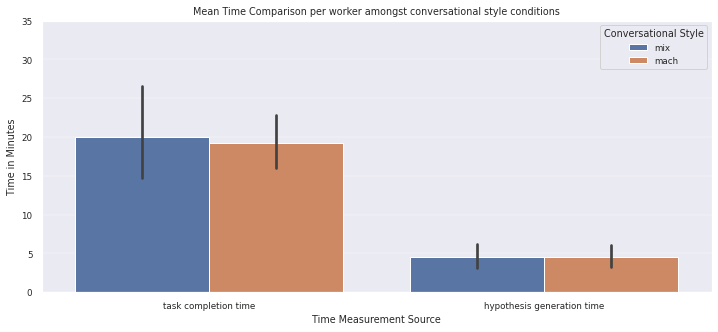

In [8]:
#time vs conv styles




#time_data_temp = time_data[time_data['information_elements'].str.contains('text') & time_data['conversational_style'].str.contains('csmix') & time_data['dataset']==1]

time_data_temp = time_data.copy()

time_data_temp['time_to_last_message'].replace('', '0', inplace=True)

time_data_temp.dropna()

time_data_temp["task completion time"] = time_data_temp["time_to_last_message"].astype(int)/1000/60





time_data_temp["hypothesis generation time"] = time_data_temp['task completion time'][time_data_temp['is_a_hypothesis']==1]


time_data_temp=time_data_temp.groupby(['workerid','information_elements', 'conversational_style', 'dataset']).agg({'task completion time': ['sum'],'hypothesis generation time': ['sum']}).reset_index()


#remove multiindex from agg
time_data_temp.columns = list(map(''.join, time_data_temp.columns.values))
time_data_temp.rename(columns = {'task completion timesum':'task completion time','hypothesis generation timesum':'hypothesis generation time'}, inplace = True)


cols_to_keep = ["task completion time", 'hypothesis generation time','conversational_style']
time_data_temp=time_data_temp[cols_to_keep]


plt.figure(figsize=(12,5))
sns.set_style('white')
sns.set_style('ticks')
sns.set(font_scale=0.8)




test_data_melted = pd.melt(time_data_temp, id_vars="conversational_style", var_name="source", value_name="value_numbers")



ax = sns.barplot(x="source",y="value_numbers", hue="conversational_style",estimator=np.mean, ci=95, data=test_data_melted)




#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 40, 5))

ax.set_ylabel('Time in Minutes')
ax.legend(title='Conversational Style')
ax.set_xlabel('Time Measurement Source')


#ax._legend.set_title("asd")
ax.set(title='Mean Time Comparison per worker amongst conversational style conditions')

plt.savefig("time_hypo_vs_overall_cs.svg", bbox_inches="tight")
plt.show()






# maybe plot with intervals
# line plot with confidence intervals

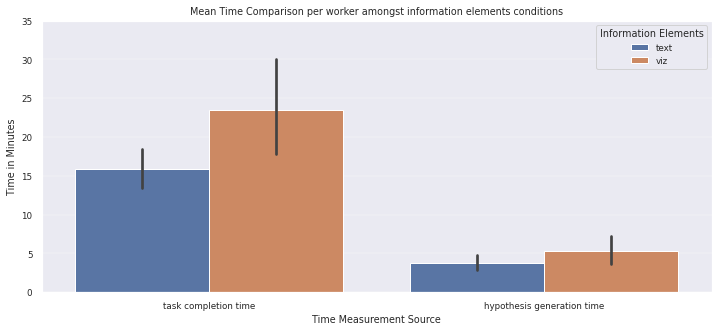

In [9]:
#time vs information elements




#time_data_temp = time_data[time_data['information_elements'].str.contains('text') & time_data['conversational_style'].str.contains('csmix') & time_data['dataset']==1]

time_data_temp = time_data.copy()

time_data_temp['time_to_last_message'].replace('', '0', inplace=True)

time_data_temp.dropna()

time_data_temp["task completion time"] = time_data_temp["time_to_last_message"].astype(int)/1000/60





time_data_temp["hypothesis generation time"] = time_data_temp['task completion time'][time_data_temp['is_a_hypothesis']==1]


time_data_temp=time_data_temp.groupby(['workerid','information_elements', 'conversational_style', 'dataset']).agg({'task completion time': ['sum'],'hypothesis generation time': ['sum']}).reset_index()


#remove multiindex from agg
time_data_temp.columns = list(map(''.join, time_data_temp.columns.values))
time_data_temp.rename(columns = {'task completion timesum':'task completion time','hypothesis generation timesum':'hypothesis generation time'}, inplace = True)


cols_to_keep = ["task completion time", 'hypothesis generation time','information_elements']
time_data_temp=time_data_temp[cols_to_keep]


plt.figure(figsize=(12,5))
sns.set_style('white')
sns.set_style('ticks')
sns.set(font_scale=0.8)




test_data_melted = pd.melt(time_data_temp, id_vars="information_elements", var_name="source", value_name="value_numbers")



ax = sns.barplot(x="source",y="value_numbers", hue="information_elements",estimator=np.mean, ci=95, data=test_data_melted)




#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 40, 5))

ax.set_ylabel('Time in Minutes')
ax.legend(title='Information Elements')
ax.set_xlabel('Time Measurement Source')


#ax._legend.set_title("asd")
ax.set(title='Mean Time Comparison per worker amongst information elements conditions')

plt.savefig("time_hypo_vs_overall_ie.svg", bbox_inches="tight")
plt.show()






# maybe plot with intervals
# line plot with confidence intervals

                workerid information_elements conversational_style  dataset  \
0  A002160837SWJFPIAI7L7                 text                  mix        2   
1         A14BSOU2Y5JNT0                  viz                 mach        1   
2         A1FS8SBR4SDWYG                 text                 mach        1   
3         A1N1ULK71RHVMM                  viz                  mix        1   
4         A1Q56N80RJLQ7S                 text                  mix        2   

   time_to_last_message  
0             11.343000  
1             25.621250  
2             13.307767  
3              8.504917  
4              8.521733  


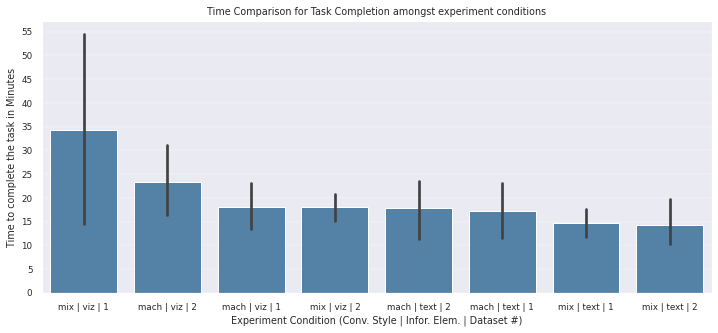

In [10]:



time_data_temp = time_data.copy()
time_data_temp['time_to_last_message'].replace('', '0', inplace=True)
time_data_temp.dropna()
time_data_temp["time_to_last_message"] = time_data_temp["time_to_last_message"].astype(int)/1000/60


time_data_temp=time_data_temp.groupby(['workerid','information_elements', 'conversational_style', 'dataset']).agg({'time_to_last_message': ['sum']}).reset_index()

#remove multiindex from agg
time_data_temp.columns = list(map(''.join, time_data_temp.columns.values))
time_data_temp.rename(columns = {'time_to_last_messagesum':'time_to_last_message'}, inplace = True)


print(time_data_temp.head())

cols_to_keep = ["time_to_last_message", 'workerid','information_elements', 'conversational_style', 'dataset']
time_data_temp=time_data_temp[cols_to_keep]





time_data_temp['experiment_condition'] =""+ time_data_temp['conversational_style']+ " | " + time_data_temp['information_elements'] +" | "+ time_data_temp['dataset'].astype(str)

grp_order = time_data_temp.groupby('experiment_condition').time_to_last_message.agg('mean').sort_values(ascending=False).index



plt.figure(figsize=(12,5))
sns.set_style('white')
sns.set_style('ticks')
sns.set(font_scale=0.8)

ax = sns.barplot(x="experiment_condition",y="time_to_last_message",estimator=np.mean, ci=95, data=time_data_temp, color='steelblue', order=grp_order)





#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 60, 5))

ax.set_ylabel('Time to complete the task in Minutes')
ax.set_xlabel('Experiment Condition (Conv. Style | Infor. Elem. | Dataset #)')

#ax._legend.set_title("asd")
ax.set(title='Time Comparison for Task Completion amongst experiment conditions')

plt.savefig("time_overall_conditions.svg", bbox_inches="tight")
plt.show()






# maybe plot with intervals
# line plot with confidence intervals

In [11]:

#ansLengthDf = pd.DataFrame(answerLengthData,columns=questions_amount_for_chart)


#df1 = pd.DataFrame(ansLengthDf.mean(), columns=["length"])



#timeDf = pd.DataFrame(timeData,columns=questions_amount_for_chart)

#df1.insert(1, "time", timeDf.mean(), True)






#plt.matshow(df1.corr())
#plt.show()

print("correlations:")

#df1[df1.columns[0:]].corr()['time'][:].sort_values(ascending=False).to_frame()

correlations:


# TLX ANALYSIS

In [12]:
# tlx survey analytics

url="https://datatalkturk.emanuelgraf.me/pipelines/tlx_into_jupyter_pipeline.php"
tlx_data=pd.read_csv(url,header=0, keep_default_na=False, sep=',')

# scale to 100
tlx_data['message']=(tlx_data['message']-1)*5




#mean score of all workers
mean_tlx_score=tlx_data.groupby(['workerid','information_elements', 'conversational_style', 'dataset']).agg({'message': ['mean']}).reset_index()

#remove multiindex from agg
mean_tlx_score.columns = list(map(''.join, mean_tlx_score.columns.values))
mean_tlx_score.rename(columns = {'messagemean':'tlx_score'}, inplace = True)

#mean score of all informational text elements 
mean_text_tlx = tlx_data[tlx_data.information_elements=="text"]


mean_tlx_score['experiment condition'] =""+ mean_tlx_score['conversational_style']+ " | " + mean_tlx_score['information_elements'] +" | "+ mean_tlx_score['dataset'].astype(str)


experiments_tlx=tlx_data.groupby(['information_elements', 'conversational_style', 'dataset']).agg({'message': ['mean']}).reset_index()

mean_tlx_score.head(3)



workerid information_elements conversational_style  dataset  \
0  A002160837SWJFPIAI7L7                 text                  mix        2   
1         A14BSOU2Y5JNT0                  viz                 mach        1   
2         A1FS8SBR4SDWYG                 text                 mach        1   

   tlx_score experiment condition  
0  39.166667       mix | text | 2  
1  45.000000       mach | viz | 1  
2  50.833333      mach | text | 1

## statistical relevance test analysis

### distribution

In [13]:

df = mean_tlx_score.copy()
grp_order = df.groupby('experiment condition')

#print(grp_order['experiment condition','hypothesis_id','quality_score_GRAF'].head(5))

variance = grp_order['tlx_score'].var()
print(variance)

experiment condition
mach | text | 1     14.236111
mach | text | 2    191.319444
mach | viz | 1      49.513889
mach | viz | 2      73.611111
mix | text | 1      73.240741
mix | text | 2     103.680556
mix | viz | 1       77.291667
mix | viz | 2      173.819444
Name: tlx_score, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'quality Score across ratings')]

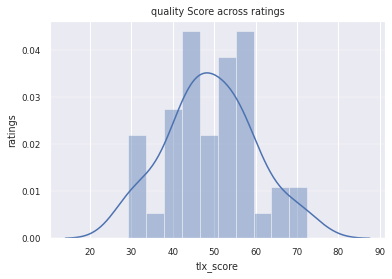

In [14]:
# test whether the data is normally distributed visually

df = mean_tlx_score.copy()


#create histogram to visualize values in dataset


ax = sns.distplot( df["tlx_score"], bins=10)

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_xlabel('tlx_score')
ax.set_ylabel('ratings')
#ax._legend.set_title("asd")
ax.set(title='quality Score across ratings')



In [15]:





# test whether the data is normally distributed

df = mean_tlx_score.copy()

print("shapiro test: ")
#perform Shapiro-Wilk test for normality
stat, p = stats.shapiro(df['tlx_score'])
print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional argument for futher use 
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else:
    print('probably not Gussian nor Normal Distribution') 
print("")


#  D'Agostino's k^2 test


stat, p = stats.normaltest(df['tlx_score'])
print("D`Agostino`s k^2 test: ")
print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional argument for futher use 
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else:
    print('probably not Gussian nor Normal Distribution') 
print("")




# perform anderson test

print("anderson test: ")
# select a column to check the normal distribution
result = stats.anderson(df['tlx_score'])
print('stat=%3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian/Normal Distribution at the %.1f%% level' % (sl))
    else:
         print('Probably not Gaussian/Normal Distribution at the %.1f%% level' % (sl))   







shapiro test: 
stat=0.981, p=0.694
Probably Gaussian or Normal Distribution

D`Agostino`s k^2 test: 
stat=0.113, p=0.945
Probably Gaussian or Normal Distribution

anderson test: 
stat=0.223218
Probably Gaussian/Normal Distribution at the 15.0% level
Probably Gaussian/Normal Distribution at the 10.0% level
Probably Gaussian/Normal Distribution at the 5.0% level
Probably Gaussian/Normal Distribution at the 2.5% level
Probably Gaussian/Normal Distribution at the 1.0% level


In [16]:
#calculate skew, kurtosis and shapiro wilk
df = mean_tlx_score.copy()

print("skew:")
print(stats.skew(df["tlx_score"], axis=0, bias=True))
print("")

print("kurtosis:")
print(stats.kurtosis(df["tlx_score"], axis=0, fisher=True, bias=True))

skew:
0.10919965972686838

kurtosis:
-0.30566713925645983


### statistical test all conditions

In [17]:
# t-test





df = mean_tlx_score.copy()

cols_to_keep = ["tlx_score","experiment condition",]
df=df[cols_to_keep]



grp_order = df.groupby('experiment condition')
arr = grp_order["tlx_score"].apply(list)


print("for these values, we reject t-test H0 hypothesis:")

#arr = df.groupby(['experiment condition'], sort=False).value.apply(list).tolist()
tested_conditions = 0
for x in range(len(arr)):
  for y in range(x+1,len(arr)):
    tested_conditions+=1
    #print(arr[x])
    res = np.asarray(arr[x])
    res2 = np.asarray(arr[y])
    ttest = stats.ttest_ind(res, res2, equal_var=False)
    #print(mannwhitneyu)
    if(ttest.pvalue<=0.05):
        #print('stat=%.3f, p=%.3f' % (stat, p))
      print(arr.keys()[x].replace(" | ","-") , " & ",arr.keys()[y].replace(" | ","-"), " & ", '%.3f' % ttest.pvalue, " \\\ \hline" )

print("Tested conditions: ",tested_conditions)



for these values, we reject t-test H0 hypothesis:
mach-text-1  &  mix-text-1  &  0.013  \\ \hline
mach-viz-1  &  mix-text-1  &  0.015  \\ \hline
mach-viz-2  &  mix-viz-1  &  0.030  \\ \hline
mix-text-1  &  mix-viz-1  &  0.005  \\ \hline
Tested conditions:  28


### statistical test merged conditions

In [18]:
# t-test


print("kruskal tests")
print("kruskal tests")
print("")


#conversational Style
df = mean_tlx_score.copy()
grp_order = df.groupby('conversational_style')
arr = grp_order["tlx_score"].apply(list)
print("Conversational Style:")
print(stats.ttest_ind(arr[0],arr[1],equal_var=False))
print("")

#information_elements
df = mean_tlx_score.copy()
grp_order = df.groupby('information_elements')
arr = grp_order["tlx_score"].apply(list)
print("information_elements:")
print(stats.ttest_ind(arr[0],arr[1],equal_var=False))
print("")

#datasets
df = mean_tlx_score.copy()
df['dataset']=df['dataset'].astype(str)
grp_order = df.groupby('dataset')
arr = grp_order["tlx_score"].apply(list)
print("dataset:")
print(stats.ttest_ind(arr[0],arr[1],equal_var=False))
print("")






kruskal tests
kruskal tests

Conversational Style:
Ttest_indResult(statistic=0.2880756009578441, pvalue=0.7748941408834129)

information_elements:
Ttest_indResult(statistic=-1.2720059129595729, pvalue=0.21073599856001443)

dataset:
Ttest_indResult(statistic=0.0, pvalue=1.0)



In [19]:
# tamhane test


print("tamhane tests")
print("tamhane tests")
print("")


#conversational Style
df = mean_tlx_score.copy()
print(sp.posthoc_tamhane(df, val_col='tlx_score', group_col='conversational_style'))
print("")

#information_elements
df = mean_tlx_score.copy()
print("information_elements:")
print(sp.posthoc_tamhane(df, val_col='tlx_score', group_col='information_elements'))
print("")

#datasets
df = mean_tlx_score.copy()
print("dataset:")
print(sp.posthoc_tamhane(df, val_col='tlx_score', group_col='dataset'))
print("")






tamhane tests
tamhane tests

           mix      mach
mix   1.000000  0.949327
mach  0.949327  1.000000

information_elements:
          text       viz
text  1.000000  0.377062
viz   0.377062  1.000000

dataset:
     2    1
2  1.0  1.0
1  1.0  1.0



In [20]:
#merged datasets



print("tamhane tests merged ds")
print("tamhane tests merged ds")
print("")


df = mean_tlx_score.copy()

df['experiment condition m_d'] =""+ df['conversational_style']+ " | " + df['information_elements'] 


cols_to_keep = ["tlx_score","experiment condition m_d",]
df=df[cols_to_keep]

sp.posthoc_tamhane(df, val_col='tlx_score', group_col='experiment condition m_d')



tamhane tests merged ds
tamhane tests merged ds



mix | text  mach | viz  mach | text  mix | viz
mix | text     1.000000    0.683659     0.223691   0.074247
mach | viz     0.683659    1.000000     0.817005   0.386759
mach | text    0.223691    0.817005     1.000000   0.926450
mix | viz      0.074247    0.386759     0.926450   1.000000

## visualisations

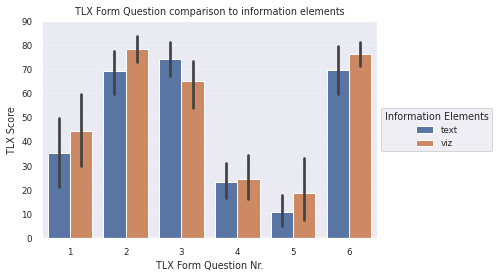

In [21]:
# compare all tlx values to visualisation and text


tlx_data_temp = tlx_data.copy()



ax = sns.barplot(x="message_nr",y="message", hue="information_elements",estimator=np.mean, ci=95, data=tlx_data_temp)






#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 100, 10))

ax.set_xlabel('TLX Form Question Nr.')
ax.set_ylabel('TLX Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')


#ax._legend.set_title("asd")
ax.set(title='TLX Form Question comparison to information elements')

plt.savefig("tlx_all_q_ie.svg", bbox_inches="tight")
plt.show()






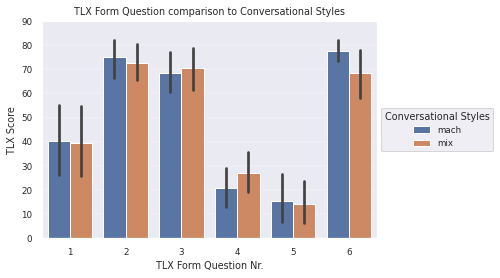

In [22]:
# compare all tlx values to visualisation and text


tlx_data_temp = tlx_data.copy()



ax = sns.barplot(x="message_nr",y="message", hue="conversational_style",estimator=np.mean, ci=95, data=tlx_data_temp)






#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 100, 10))

ax.set_xlabel('TLX Form Question Nr.')
ax.set_ylabel('TLX Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Conversational Styles')


#ax._legend.set_title("asd")
ax.set(title='TLX Form Question comparison to Conversational Styles')

plt.savefig("tlx_all_q_cs.svg", bbox_inches="tight")
plt.show()






In [23]:
#ds preparation for tlx comparison 1

ds = mean_tlx_score.copy()

ds.drop([  "workerid"], axis=1, inplace=True)



ds_plot=ds#.groupby(['information_elements', 'conversational_style']).agg({'tlx_score': ['mean']}).reset_index()


#ds = mean_tlx_score.pivot(index='workerid', columns=['conversational_style','information_elements'], values='tlx_score').reset_index()
#ds.columns.name=None


#remove multiindex from agg
ds_plot.columns = list(map(''.join, ds_plot.columns.values))
ds_plot.rename(columns = {'tlx_scoremean':'tlx_score'}, inplace = True)

ds_plot.head()


information_elements conversational_style  dataset  tlx_score  \
0                 text                  mix        2  39.166667   
1                  viz                 mach        1  45.000000   
2                 text                 mach        1  50.833333   
3                  viz                  mix        1  55.833333   
4                 text                  mix        2  62.500000   

  experiment condition  
0       mix | text | 2  
1       mach | viz | 1  
2      mach | text | 1  
3        mix | viz | 1  
4       mix | text | 2

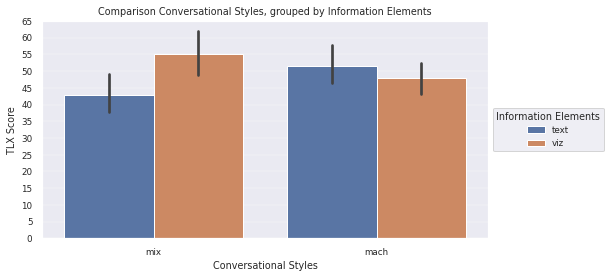

In [24]:
# conv style mixed vs machine grouped by information elements

plt.figure(figsize=(8,4))
sns.set_style('white')
sns.set_style('ticks')
sns.set(font_scale=0.8)

ax = sns.barplot(x="conversational_style", y="tlx_score", hue="information_elements",estimator=np.mean, ci=95, data=ds_plot)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 70, 5))

ax.set_xlabel('Conversational Styles')
ax.set_ylabel('TLX Score')
#ax._legend.set_title("asd")
ax.set(title='Comparison Conversational Styles, grouped by Information Elements')

plt.savefig("tlx_cs_ie.svg", bbox_inches="tight")
plt.show()


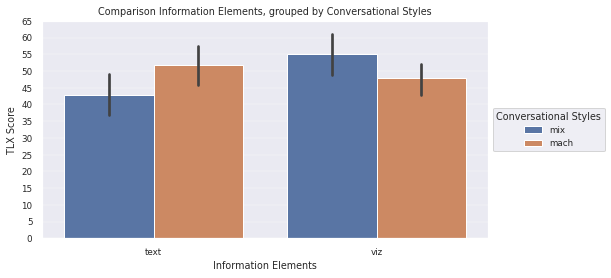

In [25]:
# conv style mixed vs machine grouped by information elements

plt.figure(figsize=(8,4))
sns.set_style('white')
sns.set_style('ticks')
sns.set(font_scale=0.8)

ax = sns.barplot(x="information_elements", y="tlx_score", hue="conversational_style",estimator=np.mean, ci=95, data=ds_plot)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Conversational Styles')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 70, 5))

ax.set_xlabel('Information Elements')
ax.set_ylabel('TLX Score')
#ax._legend.set_title("asd")
ax.set(title='Comparison Information Elements, grouped by Conversational Styles')

plt.savefig("tlx_ie_cs.svg", bbox_inches="tight")
plt.show()


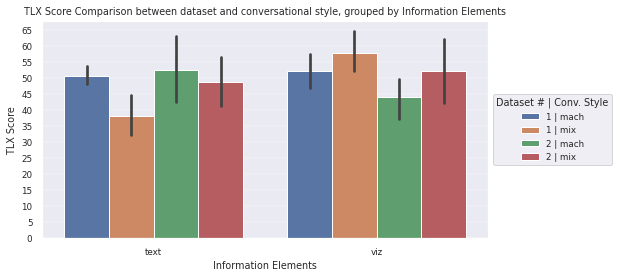

In [26]:
# text vs viz, grouped by conversational styles


plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ds_plot["dataset and conversational style"] = ds_plot["dataset"].astype(str) + " | " + ds_plot["conversational_style"]

hue_order = ['1 | mach','1 | mix','2 | mach','2 | mix',]

ax = sns.barplot(hue="dataset and conversational style", y="tlx_score", x="information_elements",estimator=np.mean, ci=95, data=ds_plot, hue_order=hue_order)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Dataset # | Conv. Style')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 70, 5))

ax.set_xlabel('Information Elements')
ax.set_ylabel('TLX Score')
#ax._legend.set_title("asd")
ax.set(title='TLX Score Comparison between dataset and conversational style, grouped by Information Elements')

plt.savefig("tlx_ie_g_cs_ds.svg", bbox_inches="tight")
plt.show()


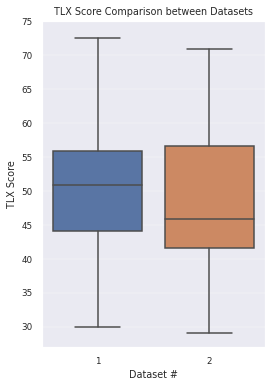

In [27]:
# ds 1 vs ds 2


ds1_vs_ds2 = mean_tlx_score.copy()

ds1_vs_ds2.drop([ 'information_elements', 'conversational_style'], axis=1, inplace=True)


#ds1_vs_ds2 = mean_tlx_score.pivot(index='workerid', columns='dataset', values='tlx_score').reset_index()
#ds1_vs_ds2.columns.name=None

#print(ds1_vs_ds2)



plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ax = sns.boxplot( y="tlx_score", x="dataset", data=ds1_vs_ds2)


ax.set_xlabel('Dataset #')
ax.set_ylabel('TLX Score')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(30, 80, 5))

#ax._legend.set_title("asd")
ax.set(title='TLX Score Comparison between Datasets')




plt.savefig("tlx_ds.svg", bbox_inches="tight")
plt.show()

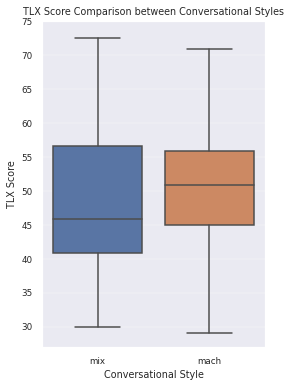

In [28]:
# cs comp


df = mean_tlx_score.copy()

#df.drop([ 'information_elements', 'conversational_style'], axis=1, inplace=True)


#df = mean_tlx_score.pivot(index='workerid', columns='dataset', values='tlx_score').reset_index()
#df.columns.name=None

#print(df)



plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ax = sns.boxplot( y="tlx_score", x="conversational_style", data=df)


ax.set_xlabel('Conversational Style')
ax.set_ylabel('TLX Score')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(30, 80, 5))

#ax._legend.set_title("asd")
ax.set(title='TLX Score Comparison between Conversational Styles')




plt.savefig("tlx_cs.svg", bbox_inches="tight")
plt.show()

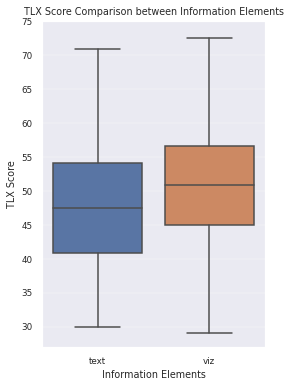

In [29]:
# inf. elem. comp


df = mean_tlx_score.copy()

#df.drop([ 'information_elements', 'conversational_style'], axis=1, inplace=True)


#df = mean_tlx_score.pivot(index='workerid', columns='dataset', values='tlx_score').reset_index()
#df.columns.name=None

#print(df)



plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ax = sns.boxplot( y="tlx_score", x="information_elements", data=df)


ax.set_xlabel('Information Elements')
ax.set_ylabel('TLX Score')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(30, 80, 5))

#ax._legend.set_title("asd")
ax.set(title='TLX Score Comparison between Information Elements')




plt.savefig("tlx_ie.svg", bbox_inches="tight")
plt.show()

# Quality Analysis

## Import data

In [39]:
#import qualitrics data
#data = pd.read_csv("Pilot Hypothesis Quality Measurement_October 15, 2022_06.33.csv")



url="https://datatalkturk.emanuelgraf.me/pipelines/quality_into_jupyter_pipeline.php"
data=pd.read_csv(url,header=0, keep_default_na=False, sep=',')

data['experiment condition'] =""+ data['conversational_style']+ " | " + data['information_elements'] +" | "+ data['dataset'].astype(str)


#df = pd.DataFrame(url)
print(data.describe())
#print(data)

## the following is the definition of a new dataframe with all quality req in it from the csv. 
## IMPORTANT: IF WE HAVE MULTIPLE EXPERIMENTS IN ONE CSV, WE NEED TO SEPARATE THEM FIRST.



df = pd.DataFrame({'sense': [],
                   'empirical': [],
                   'variables': [],
                   'relevance': [],
                   'precise': [],
                   'clarity': [],
                   'plausibility': []})






                id     dataset  hypothesis_id       sense   empirical  \
count   492.000000  492.000000     492.000000  492.000000  492.000000   
mean    861.695122    1.560976      82.500000    0.831301    0.668699   
std     146.394650    0.496773      47.390027    0.374867    0.471160   
min     611.000000    1.000000       1.000000    0.000000    0.000000   
25%     733.750000    1.000000      41.750000    1.000000    0.000000   
50%     863.000000    2.000000      82.500000    1.000000    1.000000   
75%     989.250000    2.000000     123.250000    1.000000    1.000000   
max    1112.000000    2.000000     164.000000    1.000000    1.000000   

        variables   relevance     precise     clarity  plausibility  
count  492.000000  492.000000  492.000000  492.000000    492.000000  
mean     0.806911    0.845528    3.014228    3.469512      3.579268  
std      0.395124    0.361768    1.230055    1.286419      1.235843  
min      0.000000    0.000000    1.000000    1.000000      1.0

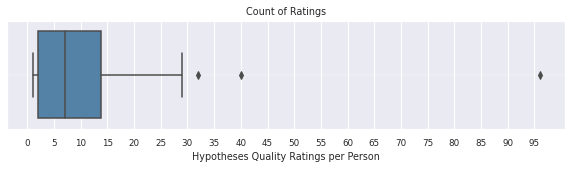

In [31]:
# amount of hypotheses ratings per experiment condition



dataframe=pd.DataFrame(data)


dataframe=dataframe.groupby(["user_hash"]).agg({'user_hash': ['count']}).reset_index()

#remove multiindex from agg (flatten and rename)
dataframe.columns = list(map(''.join, dataframe.columns.values))
dataframe.rename(columns = {'user_hashcount':'count'}, inplace = True)

plt.figure(figsize=(10,2))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ax = sns.boxplot(x="count", data=dataframe, color='steelblue')


#ax.set_xlabel('Person')
ax.set_xlabel('Hypotheses Quality Ratings per Person')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_xticks(np.arange(0, 100, 5))

#ax._legend.set_title("asd")
ax.set(title='Count of Ratings')




plt.savefig("count_ratings_per_raters.svg", bbox_inches="tight")
plt.show()




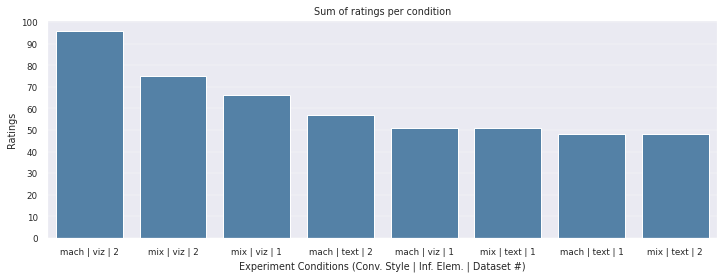

In [32]:
# amount of hypotheses ratings per experiment condition



dataframe=pd.DataFrame(data)


cols_to_keep = ["hypothesis_id","experiment condition",]
dataframe=dataframe[cols_to_keep]




plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)



grp_order = dataframe.groupby('experiment condition')["hypothesis_id"].agg('count').sort_values(ascending=False).index

ax = sns.countplot(x="experiment condition", data=dataframe, color='steelblue', order=grp_order)


ax.set_xlabel('Experiment Conditions (Conv. Style | Inf. Elem. | Dataset #)')
ax.set_ylabel('Ratings')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(0,110, 10))

#ax._legend.set_title("asd")
ax.set(title='Sum of ratings per condition')




plt.savefig("count_cond_rating.svg", bbox_inches="tight")
plt.show()




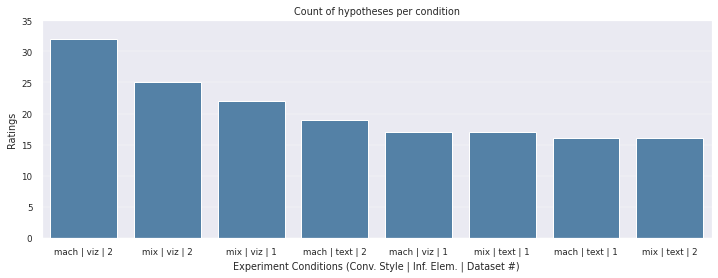

In [33]:
# amount of hypotheses per experiment condition



dataframe=pd.DataFrame(data)



cols_to_keep = ["hypothesis_id","experiment condition",]
dataframe=dataframe[cols_to_keep]




plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


dataframe=dataframe.drop_duplicates(subset=["hypothesis_id"])




grp_order = dataframe.groupby('experiment condition')["hypothesis_id"].agg('count').sort_values(ascending=False).index

ax = sns.countplot(x="experiment condition", data=dataframe, color='steelblue', order=grp_order)


ax.set_xlabel('Experiment Conditions (Conv. Style | Inf. Elem. | Dataset #)')
ax.set_ylabel('Ratings')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(0,40, 5))

#ax._legend.set_title("asd")
ax.set(title='Count of hypotheses per condition')




plt.savefig("count_cond_hyp.svg", bbox_inches="tight")
plt.show()




## Quality Score Calculation

In [34]:


cols_to_keep = ["variables","sense","empirical","precise","clarity","plausibility","relevance"]
dataframe=data[cols_to_keep]

dataframe.describe()

variables       sense   empirical     precise     clarity  \
count  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     0.806911    0.831301    0.668699    3.014228    3.469512   
std      0.395124    0.374867    0.471160    1.230055    1.286419   
min      0.000000    0.000000    0.000000    1.000000    1.000000   
25%      1.000000    1.000000    0.000000    2.000000    3.000000   
50%      1.000000    1.000000    1.000000    3.000000    4.000000   
75%      1.000000    1.000000    1.000000    4.000000    4.000000   
max      1.000000    1.000000    1.000000    5.000000    5.000000   

       plausibility   relevance  
count    492.000000  492.000000  
mean       3.579268    0.845528  
std        1.235843    0.361768  
min        1.000000    0.000000  
25%        3.000000    1.000000  
50%        4.000000    1.000000  
75%        5.000000    1.000000  
max        5.000000    1.000000

In [40]:

for i, row in data.iterrows():


  #quinn and george FORMULA

    #     Quality (q&g) = ​
    #      1.   ([variables*5 + sense *5 + empirical *5 + precision]/4)  *
    #      2.   (⌈[variables + sense + empirical   + ⌊precision/5⌉]/4⌉)

  # 1. ([variables*5 + sense *5 + empirical *5 + precision]/4)
  p1 = ((row["variables"]*5 + row["sense"]*5 +row["empirical"]*5 +row["precise"])) /4
  # 2. ​(⌈[variables + sense + empirical   + ⌊precision/5⌉]/4⌉)
  p2 = math.ceil((row["variables"]
                  +row["sense"] 
                  +row["empirical"] 
                  +round(row["precise"]/5)) /4)

  quality_Q_G = p1*p2

  data.at[i, 'quality_score_Q_and_G'] = quality_Q_G





    #willet formula

    # quality = 
    #  ((clarity + plausibility) /2) × (relevance)


  # 1. [clarity + plausibility]/2)
  p1 = (row["clarity"] +row["plausibility"]) /2 
  # 2. ​[relevance] 
  p2 = row["relevance"]
  quality_willet = p1*p2

  #quality_df.loc[len(quality_df.index)] = quality_5
  #data.set_value(i, 'quality_score', quality_5)
  data.at[i, 'quality_score_WILLET'] = quality_willet

  data.at[i, 'quality_score_GRAF'] = (quality_willet+quality_Q_G)/2





In [41]:
# aggregate all quality ratings per hypothesis to the mean of the quality ratings to each hypothesis

grp_order = data.groupby(["dataset","conversational_style","information_elements", "hypothesis_id","hypothesis",'experiment condition' ]).agg({'quality_score_GRAF':['mean'],'quality_score_WILLET':['mean'],'quality_score_Q_and_G':['mean']}).reset_index()

#remove multiindex from agg (flatten and rename)
grp_order.columns = list(map(''.join, grp_order.columns.values))
grp_order.rename(columns = {'quality_score_GRAFmean':'quality_score_GRAF','quality_score_WILLETmean':'quality_score_WILLET','quality_score_Q_and_Gmean':'quality_score_Q_and_G'}, inplace = True)




data=grp_order

data.describe()




dataset  hypothesis_id  quality_score_GRAF  quality_score_WILLET  \
count  164.000000      164.00000          164.000000            164.000000   
mean     1.560976       82.50000            3.368648              3.115854   
std      0.497788       47.48684            0.970790              1.138108   
min      1.000000        1.00000            0.000000              0.000000   
25%      1.000000       41.75000            2.989583              2.625000   
50%      2.000000       82.50000            3.604167              3.333333   
75%      2.000000      123.25000            4.083333              4.000000   
max      2.000000      164.00000            4.750000              5.000000   

       quality_score_Q_and_G  
count             164.000000  
mean                3.621443  
std                 0.999759  
min                 0.000000  
25%                 3.229167  
50%                 3.833333  
75%                 4.333333  
max                 4.916667

In [43]:
data["hypothesis"].describe()


count                                                   164
unique                                                  164
top       If a company offers mental health benefits, ch...
freq                                                      1
Name: hypothesis, dtype: object

In [68]:
#best, worst hypotheses, for latex


data_temp = data.copy()


df = data_temp.sort_values('quality_score_GRAF',ascending=True)[['hypothesis',"quality_score_GRAF"]].head(10)

for i, row in df.iterrows():
    print(row["hypothesis"]," & ",row["quality_score_GRAF"], " \\\\")


print("... & ...", " \\\\")

df = data_temp.sort_values('quality_score_GRAF',ascending=False)[['hypothesis',"quality_score_GRAF"]].head(10)
df = df.sort_values('quality_score_GRAF',ascending=True)[['hypothesis',"quality_score_GRAF"]].head(10)

for i, row in df.iterrows():
    print(row["hypothesis"]," & ",row["quality_score_GRAF"], " \\\\")


Integrity and Discipline are to be act in line with our values ,even  when it feels uncomfortable.  &  0.0  \\
 the lower the overall rating of the product.  &  0.16666666666666666  \\
It both help  to understand where you came from and where you wnat to go wit theraphy and beyond.  &  0.25  \\
I want to but I can't scroll up and see the chart very well  &  0.375  \\
The higher the version number of the product  &  0.5833333333333334  \\
Certainly the graphs and spreadsheets demonstrated deepen a research rich in data and new studies.  &  1.0833333333333333  \\
 A person might want to be anonymous and not speak with their coworkers  &  1.125  \\
A person that knows about a wellness program and about how to seek help would also  imply that you know what your care options are.  &  1.2916666666666667  \\
Having a mental health condition leads to an increase in mental health consequences.  &  1.3333333333333333  \\
 the largest being between 1-2 USD.  &  1.3333333333333333  \\
 and the low

## statistical test analysis

### statistical test all conditions separated


variance

In [ ]:

df = data.copy()
grp_order = df.groupby('experiment condition')

#print(grp_order['experiment condition','hypothesis_id','quality_score_GRAF'].head(5))

variance = grp_order['quality_score_GRAF'].var()
print(variance)

So the variance seems to be rather different across the groups. 
https://www.statisticshowto.com/unequal-sample-sizes/



### check distribution across conditions

In [ ]:
#calculate skew, kurtosis and shapiro wilk
df = data.copy()

print("skew:")
print(stats.skew(df["quality_score_GRAF"], axis=0, bias=True))
print("")

print("kurtosis:")
print(stats.kurtosis(df["quality_score_GRAF"], axis=0, fisher=True, bias=True))

In [ ]:
# test whether the data is normally distributed visually

df = data.copy()


#create histogram to visualize values in dataset


ax = sns.distplot( df["quality_score_GRAF"], bins=10)

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_xlabel('Quality Score')
ax.set_ylabel('ratings')
#ax._legend.set_title("asd")
ax.set(title='quality Score across ratings')



In [ ]:
# test whether the data is normally distributed

df = data.copy()

print("shapiro test: ")
#perform Shapiro-Wilk test for normality
stat, p = stats.shapiro(df['quality_score_GRAF'])
print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional argument for futher use 
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else:
    print('probably not Gussian nor Normal Distribution') 
print("")


#  D'Agostino's k^2 test


stat, p = stats.normaltest(df['quality_score_GRAF'])
print("D`Agostino`s k^2 test: ")
print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional argument for futher use 
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else:
    print('probably not Gussian nor Normal Distribution') 
print("")




# perform anderson test

print("anderson test: ")
# select a column to check the normal distribution
result = stats.anderson(df['quality_score_GRAF'])
print('stat=%3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian/Normal Distribution at the %.1f%% level' % (sl))
    else:
         print('Probably not Gaussian/Normal Distribution at the %.1f%% level' % (sl))   







In [ ]:
#visual analysis
df = data.copy()

cols_to_keep = ["quality_score_GRAF","experiment condition",]
df=df[cols_to_keep]



grp_order = df.groupby('experiment condition')
arr = grp_order["quality_score_GRAF"].apply(list)

#for x in range(len(grp_order)):
  #print(grp_order.get_group(list(grp_order.groups.keys())[x]).apply(list))


sns.set()
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(8,1)
plt.figure(figsize=(8,14))
fig.set_size_inches(5, 12)
#arr = df.groupby(['experiment condition'], sort=False).value.apply(list).tolist()
tested_conditions = 0
for x in range(len(arr)):

  ax = sns.distplot( arr[x], bins=10, ax=axes[x])

  #ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

  #ax.set_xlabel('Quality Score')
  #ax.set_ylabel('ratings')
  #ax._legend.set_title("asd")
  ax.set(title=arr.keys()[x])

In [ ]:
#perform Shapiro-Wilk test for normality for every condition


df = data.copy()

cols_to_keep = ["quality_score_GRAF","experiment condition",]
df=df[cols_to_keep]



grp_order = df.groupby('experiment condition')
arr = grp_order["quality_score_GRAF"].apply(list)

#for x in range(len(grp_order)):
  #print(grp_order.get_group(list(grp_order.groups.keys())[x]).apply(list))


print("shapiro test: ")

#arr = df.groupby(['experiment condition'], sort=False).value.apply(list).tolist()
tested_conditions = 0

skew_total = 0
shapiro_total = 0
kurtosis_total = 0
for x in range(len(arr)):
  #perform Shapiro-Wilk test for normality
  stat, p = stats.shapiro(arr[x])
  #print('stat=%.3f, p=%.3f' % (stat, p))
  shapiro_total +=stat
  skew_total += stats.skew(arr[x])
  kurtosis_total += stats.kurtosis(arr[x], axis=0, fisher=True, bias=True)
  # make a conditional argument for futher use 
  if p > 0.05:
      print('Gaussian or Normal Distribution')
  else:
      print('not Gussian nor Normal Distribution') 

print("skew avg:")
print(skew_total/8)
print("kurtosis avg:")
print(kurtosis_total/8)
print("shapiro avg:")
print(shapiro_total/8)
print("")
print("")
print("")




print("D`Agostino`s k^2 test: ")

#arr = df.groupby(['experiment condition'], sort=False).value.apply(list).tolist()
tested_conditions = 0
for x in range(len(arr)):
  #perform normaltest test for normality
  stat, p = stats.normaltest(arr[x])
  #print('stat=%.3f, p=%.3f' % (stat, p))

  # make a conditional argument for futher use 
  if p > 0.05:
      print('Gaussian or Normal Distribution')
  else:
      print('not Gussian nor Normal Distribution') 
print("")
print("")
print("")




print("anderson test: ")

#arr = df.groupby(['experiment condition'], sort=False).value.apply(list).tolist()
tested_conditions = 0
for x in range(len(arr)):
  #perform anderson test for normality
  result = stats.anderson(arr[x])
  #print('stat=%.3f, p=%.3f' % (stat, p))
  for i in range(len(result.critical_values)):
      sl, cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < cv:
          print('Gaussian/Normal Distribution at the %.1f%% level' % (sl))
      else:
           print('not Gaussian/Normal Distribution at the %.1f%% level' % (sl))   
print("")

### man whitney u test


We have no normal distribution. Even if some conditions have it, it does not matter: https://www.real-statistics.com/non-parametric-tests/wilcoxon-rank-sum-test/ "Even for large samples where the assumptions for the t-test are met, the Wilcoxon Rank-Sum test is only a little less efficient than the t-test."[Linktext](https://)


The Mann-Whitney U test will be used. 

- H0: the distribution of scores for the two groups are equal


- HA: the distribution of scores for the two groups are not equal

However, another way to express the alternative hypothesis is as follows:

- HA: the mean ranks of the two groups are not equal

P-Value <0.05 -> rejection of H0

https://statistics.laerd.com/statistical-guides/mann-whitney-u-test-assumptions.php

In [ ]:




#perform the Mann-Whitney U test





df = data.copy()

cols_to_keep = ["quality_score_GRAF","experiment condition",]
df=df[cols_to_keep]



grp_order = df.groupby('experiment condition')
arr = grp_order["quality_score_GRAF"].apply(list)

#for x in range(len(grp_order)):
  #print(grp_order.get_group(list(grp_order.groups.keys())[x]).apply(list))


print("for these values, we reject Mann-Whitney U test H0 hypothesis:")

#arr = df.groupby(['experiment condition'], sort=False).value.apply(list).tolist()
tested_conditions = 0
for x in range(len(arr)):
  for y in range(x+1,len(arr)):
    tested_conditions+=1
    #print(arr[x])
    res = np.asarray(arr[x])
    res2 = np.asarray(arr[y])
    mannwhitneyu = stats.mannwhitneyu(res, res2, alternative='two-sided')
    #print(mannwhitneyu)
    if(mannwhitneyu.pvalue<=0.05):
        #print('stat=%.3f, p=%.3f' % (stat, p))
      print(arr.keys()[x].replace(" | ","-") , " & ",arr.keys()[y].replace(" | ","-"), " & ", '%.3f' % mannwhitneyu.pvalue, " \\\ \hline" )

print("Tested conditions: ",tested_conditions)


#A very small p-value rejects the null hypothesis.




#### not used statistical *tests*

In [ ]:
#let's try kruskal first

df = data.copy()

cols_to_keep = ["quality_score_GRAF","experiment condition",]
df=df[cols_to_keep]



grp_order = df.groupby('experiment condition')
arr = grp_order["quality_score_GRAF"].apply(list)

#for x in range(len(grp_order)):
  #print(grp_order.get_group(list(grp_order.groups.keys())[x]).apply(list))


#arr = df.groupby(['experiment condition'], sort=False).value.apply(list).tolist()
tested_conditions = 0
for x in range(len(arr)):
  for y in range(x+1,len(arr)):
    tested_conditions+=1
    #print(arr[x])
    res = np.asarray(arr[x])
    res2 = np.asarray(arr[y])
    kruskal = stats.kruskal(res, res2)
    if(kruskal[1]<=0.05):
      print(arr.keys()[x] , " - ",arr.keys()[y], ": ", kruskal[1] )

print("Tested conditions: ",tested_conditions)

print("overall:")
print(stats.kruskal(arr[0],arr[1],arr[2],arr[3],arr[4],arr[5],arr[6],arr[7],))

In [ ]:
# tamhane t2 test
# might be wrong, because it is parametric: https://towardsdatascience.com/parametric-vs-non-parametric-tests-and-where-to-use-them-85130b3877dc


# https://pythonawesome.com/multiple-pairwise-comparisons-post-hoc-tests-in-python/
# https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_tamhane/


df = data.copy()

sp.posthoc_tamhane(df, val_col='quality_score_GRAF', group_col='experiment condition')



# p-value below 0.05 is statistically significant

In [ ]:
# Dunn’s test
# https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/
df = data.copy()

sp.posthoc_dunn(df,val_col='quality_score_GRAF', group_col='experiment condition')

### Statistical Tests merged conditions

In [ ]:
# Mann-Whitney U test with merged



#conversational Style
df = data.copy()
grp_order = df.groupby('conversational_style')
arr = grp_order["quality_score_GRAF"].apply(list)
print("Conversational Style:")
mannwhitneyu = stats.mannwhitneyu(arr[0],arr[1], alternative='two-sided')
print(mannwhitneyu)
print("")

#information_elements
df = data.copy()
grp_order = df.groupby('information_elements')
arr = grp_order["quality_score_GRAF"].apply(list)
print("information_elements:")
mannwhitneyu = stats.mannwhitneyu(arr[0],arr[1], alternative='two-sided')
print(mannwhitneyu)
print("")

#datasets
df = data.copy()
df['dataset']=df['dataset'].astype(str)
grp_order = df.groupby('dataset')
arr = grp_order["quality_score_GRAF"].apply(list)
print("dataset:")
mannwhitneyu = stats.mannwhitneyu(arr[0],arr[1], alternative='two-sided')
print(mannwhitneyu)
print("")









In [ ]:
# merged datasets, mannwhitney u


df = data.copy()

df['experiment condition m_d'] =""+ df['conversational_style']+ " | " + df['information_elements'] 


cols_to_keep = ["quality_score_GRAF","experiment condition m_d",]
df=df[cols_to_keep]



grp_order = df.groupby('experiment condition m_d')
arr = grp_order["quality_score_GRAF"].apply(list)

#for x in range(len(grp_order)):
  #print(grp_order.get_group(list(grp_order.groups.keys())[x]).apply(list))



print("for these values, we reject Mann-Whitney U test H0 hypothesis:")



#arr = df.groupby(['experiment condition'], sort=False).value.apply(list).tolist()
tested_conditions = 0
for x in range(len(arr)):
  for y in range(x+1,len(arr)):
    tested_conditions+=1
    #print(arr[x])
    res = np.asarray(arr[x])
    res2 = np.asarray(arr[y])
    mannwhitneyu = stats.mannwhitneyu(res, res2, alternative='two-sided')
    if(mannwhitneyu[1]<=0.05):
      print(arr.keys()[x] , " - ",arr.keys()[y], ": ", mannwhitneyu[1] )

print("Tested conditions: ",tested_conditions)




## Quality ***Analysis***

In [ ]:
# text vs viz, grouped by conversational styles

data_temp = data.copy()

plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


data_temp["dataset and conversational style"] = data_temp["dataset"].astype(str) + " | " + data_temp["conversational_style"]

hue_order = ['1 | mach','1 | mix','2 | mach','2 | mix',]

ax = sns.barplot(hue="dataset and conversational style", y="quality_score_GRAF", x="information_elements",estimator=np.median, ci=95, data=data_temp, hue_order=hue_order)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Dataset # | Conv. Style')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 5.5, 0.5))

ax.set_xlabel('Information Elements')
ax.set_ylabel('Quality Score')
#ax._legend.set_title("asd")
ax.set(title='Quality Score Comparison between dataset and conversational style, grouped by Information Elements')

plt.savefig("quality_ie_g_cs_ds.svg", bbox_inches="tight")
plt.show()


In [ ]:
# text vs viz, grouped by conversational styles

data_temp = data.copy()

plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


data_temp["dataset and information elements"] = data_temp["dataset"].astype(str) + " | " + data_temp["information_elements"]

hue_order = ['1 | text','1 | viz','2 | text','2 | viz',]

ax = sns.barplot(hue="dataset and information elements", y="quality_score_GRAF", x="conversational_style",estimator=np.median, ci=95, data=data_temp, hue_order=hue_order)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Dataset # | Info. Elem')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 5.5, 0.5))

ax.set_xlabel('Conversational Style')
ax.set_ylabel('Quality Score')
#ax._legend.set_title("asd")
ax.set(title='Quality Score Comparison between dataset and Information Elements, grouped by Conversational Style')

plt.savefig("quality_cs_g_ie_ds.svg", bbox_inches="tight")
plt.show()


In [ ]:


df = data.copy()

df['experiment condition m_d'] =""+ df['conversational_style']+ " | " + df['information_elements']


plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)

grp_order = df.groupby('experiment condition m_d').quality_score_GRAF.agg('median').sort_values(ascending=False).index


ax = sns.barplot(x="experiment condition m_d",y="quality_score_GRAF",estimator=np.median , color='steelblue', ci=95, data=df, order=grp_order)

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 5.5, 0.5))

ax.set_xlabel('Conditions (Conv. Style | Info. Elem.)')
ax.set_ylabel('Hypothesis Quality Score')

ax.set(title='Median Quality Score Comparison between conditions with merged datasets')

plt.savefig("quality_all_cond_merg_ds.svg", bbox_inches="tight")
plt.show()

In [ ]:
dataframe=pd.DataFrame(data)

cols_to_keep = ["hypothesis_id","conversational_style","information_elements","quality_score_GRAF", "dataset"]
dataframe=dataframe[cols_to_keep]


df=dataframe.groupby(["hypothesis_id","conversational_style","information_elements", "dataset"]).agg({'quality_score_GRAF': ['mean']}).reset_index()

#remove multiindex from agg (flatten and rename)
df.columns = list(map(''.join, df.columns.values))
df.rename(columns = {'quality_score_GRAFmean':'quality_score_GRAF'}, inplace = True)


df = df.pivot(index='hypothesis_id', columns=["conversational_style","information_elements", "dataset"], values='quality_score_GRAF').reset_index()
df.columns.name=None

df.drop('hypothesis_id', axis=1, inplace=True)



print("quality score split up by all captured influencal factors:")

pd.options.display.max_rows
print(df.describe())

df.mean().sort_values( ascending=False).plot(kind='bar', yerr=df.std())



In [ ]:

# compare conversational style conditions (merged datasets)

dataframe=pd.DataFrame(data)

cols_to_keep = ["hypothesis_id","conversational_style","information_elements","quality_score_GRAF", "dataset"]
dataframe=dataframe[cols_to_keep]


plt.figure(figsize=(8,4))
sns.set_style('white')
sns.set_style('ticks')
sns.set(font_scale=0.8)

ax = sns.barplot(x="conversational_style", y="quality_score_GRAF", hue="information_elements",estimator=np.median, ci=95, data=dataframe)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Information Elements')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 5.5, .5))

ax.set_xlabel('Conversational Styles')
ax.set_ylabel('Quality Score')
#ax._legend.set_title("asd")
ax.set(title='Comparison Conversational Styles, grouped by Information Elements')

plt.savefig("quality_cs_ie.svg", bbox_inches="tight")
plt.show()




In [ ]:

# compare conversational style conditions (merged datasets)

dataframe=pd.DataFrame(data)

cols_to_keep = ["hypothesis_id","conversational_style","information_elements","quality_score_GRAF", "dataset"]
dataframe=dataframe[cols_to_keep]


plt.figure(figsize=(8,4))
sns.set_style('white')
sns.set_style('ticks')
sns.set(font_scale=0.8)

ax = sns.barplot(hue="conversational_style", y="quality_score_GRAF", x="information_elements",estimator=np.median, ci=95, data=dataframe)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Conversational Styles')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 5.5, .5))

ax.set_xlabel('Information Elements')
ax.set_ylabel('Quality Score')
#ax._legend.set_title("asd")
ax.set(title='Comparison Information Elements, grouped by Conversational Styles')

plt.savefig("quality_ie_cs.svg", bbox_inches="tight")
plt.show()




In [ ]:
# inf. elem. comp

df = data.copy()

print(df.groupby(["information_elements"])["quality_score_GRAF"].describe())



plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ax = sns.boxplot( y="quality_score_GRAF", x="information_elements", data=df)


ax.set_xlabel('Information Elements')
ax.set_ylabel('Quality Score')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(0, 6, 0.5))

#ax._legend.set_title("asd")
ax.set(title='Quality Score Comparison between Information Elements')




plt.savefig("quality_ie.svg", bbox_inches="tight")
plt.show()

In [ ]:
# inf. elem. comp

df = data.copy()

print(df.groupby(["information_elements"])["quality_score_GRAF"].describe())



plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ax = sns.violinplot( y="quality_score_GRAF", x="information_elements", data=df)


ax.set_xlabel('Information Elements')
ax.set_ylabel('Quality Score')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(0, 6, 0.5))

#ax._legend.set_title("asd")
ax.set(title='Quality Score Comparison between Information Elements')




plt.savefig("quality_ie_violin.svg", bbox_inches="tight")
plt.show()

In [ ]:
# conv style comp

df = data.copy()


print(df.groupby(["conversational_style"])["quality_score_GRAF"].describe())



plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ax = sns.boxplot( y="quality_score_GRAF", x="conversational_style", data=df)


ax.set_xlabel('Conversational Styles')
ax.set_ylabel('Quality Score')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(0, 6, 0.5))

#ax._legend.set_title("asd")
ax.set(title='Quality Score Comparison between Conversational Styles')




plt.savefig("quality_cs.svg", bbox_inches="tight")
plt.show()

In [ ]:
# ds comp

df = data.copy()

print(df.groupby(["dataset"])["quality_score_GRAF"].describe())



plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)


ax = sns.boxplot( y="quality_score_GRAF", x="dataset", data=df)


ax.set_xlabel('Dataset #')
ax.set_ylabel('Quality Score')

ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)

ax.set_yticks(np.arange(0, 6, 0.5))

#ax._legend.set_title("asd")
ax.set(title='Quality Score Comparison between Datasets')




plt.savefig("quality_ds.svg", bbox_inches="tight")
plt.show()

In [ ]:
# comparison graf1, graf2, willet
# merged datasets



dataframe=pd.DataFrame(data)

cols_to_keep = ["hypothesis_id","conversational_style","information_elements","quality_score_GRAF","quality_score_Q_and_G", "quality_score_WILLET"]
dataframe=dataframe[cols_to_keep]
dataframe["merged_ds"] = dataframe["conversational_style"] +" | "+ dataframe["information_elements"]

dataframe=dataframe.melt(id_vars=['merged_ds'], value_vars=["quality_score_GRAF","quality_score_Q_and_G", "quality_score_WILLET"])






plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.set(font_scale=0.8)



ax = sns.barplot(hue="variable", y="value", x="merged_ds",estimator=np.median, ci=95, data=dataframe)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Quality Formula')
ax.yaxis.grid(True, which='both', linestyle='-', linewidth=0.3)
ax.set_yticks(np.arange(0, 5.5, 0.5))

ax.set_xlabel('Experiment Conditions (Conv. Style | Info. Elem.)')
ax.set_ylabel('Quality Score')
ax.set(title='Quality Score Comparison across Formulas, grouped by Experiment Conditions')

plt.savefig("quality_formula_comp.svg", bbox_inches="tight")
plt.show()


